# Assignment 3
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


# Mustafizur Bhuiyan
Tuesday May 1st, 2018

# 1.1 Two Principal Components

In [148]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd ##pandas dataframes are often used for statistical analysis,
import seaborn as sb ##includes convenient heatmaps and boxplots
import sklearn.linear_model as sklm ##Includes Logistic Regression, which will be tested for predictive capability
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.pipeline as skpl ##Convenient module for calculating PCs and using them in logistic regression
import matplotlib.pyplot as plt
%matplotlib inline

zipdata = np.loadtxt("/Users/mustafizurbhuiyan/Documents/Data Science Certificate/Applied Statistics/ycbs255-master/jupyter/data/ziptrain.csv")
ziptest=np.loadtxt('/Users/mustafizurbhuiyan/Documents/Data Science Certificate/Applied Statistics/ycbs255-master/jupyter/data/ziptest.csv')

zipdata.shape

(7291, 257)

In [149]:
zipdata2=zipdata[zipdata[:, 0] == 2]
print(zipdata2.shape)
zipdata7=zipdata[zipdata[:,0]==7]
print(zipdata7.shape)
# only 658 samples are 3

(731, 257)
(645, 257)


In [150]:
# let's visualize 10 random sample of them
np.random.seed(1)
random2=np.random.choice(range(len(zipdata2)), size=20, replace = False)
random7=np.random.choice(range(len(zipdata7)), size=20, replace = False)

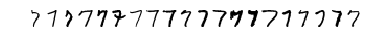

In [151]:
zipdata2stack = zipdata2[random2[0], 1:].reshape(16, 16)

for i in range(1,len(random2)):
    zipdata2stack = np.hstack((zipdata2stack, zipdata2[random2[i],1:].reshape(16, 16)))

plt.imshow(-zipdata2stack,"gray");
plt.axis("off");

zipdata7stack = zipdata7[random7[0], 1:].reshape(16, 16)

for i in range(1,len(random7)):
    zipdata7stack = np.hstack((zipdata7stack, zipdata7[random7[i],1:].reshape(16, 16)))

plt.imshow(-zipdata7stack,"gray");
plt.axis("off");

In [152]:
zipdata27 = np.vstack([zipdata2, zipdata7])
zipdata27.shape

(1376, 257)

In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# remove the first column (image label)
pca.fit(zipdata27[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

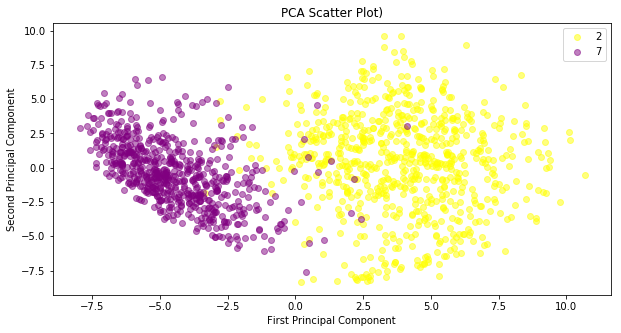

In [154]:
X = pca.transform(zipdata27[:,1:])
plt.figure(figsize=(10,5))
twos = plt.scatter(X[zipdata27[:,0]==2,0], X[zipdata27[:,0]==2,1], c= 'yellow', alpha = 0.5, label = '2')
sevens = plt.scatter(X[zipdata27[:,0]==7,0], X[zipdata27[:,0]==7,1], c= 'purple', alpha = 0.5, label= '7')
plt.legend(handles = [twos,sevens])
plt.xlabel('First Principal Component');
plt.ylabel('Second Principal Component');
plt.title("PCA Scatter Plot)");

# 1.2 Logistic Regression

In [155]:
zipdata27[10:,0]
y = zipdata27


In [156]:
y[y == 2] = 0
y[y == 7] = 1

In [157]:
y[10:,0]

array([ 0.,  0.,  0., ...,  1.,  1.,  1.])

In [158]:
y = y[:,0]
y.shape

(1376,)

In [159]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

print(X.shape)

(1376, 2)


In [160]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X)
print("confusion matrix \n",confusion_matrix(y, y_pred))

confusion matrix 
 [[713  18]
 [ 13 632]]


In [163]:
print("accuracy score:", accuracy_score(y, y_pred))

accuracy score: 0.977470930233


# 2. Multiple Principal Components

In [166]:
zlogtest = np.vstack([ziptest[ziptest[:,0]==2], ziptest[ziptest[:,0]==7]])


In [168]:
pca_test = PCA(n_components= 2)
pca_test.fit(zlogtest[:,1:])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [170]:
X_test = pca_test.fit_transform(zlogtest[:,1:])
X_test.reshape(-1,2)[:10]

array([[ 4.50521404, -2.07098109],
       [ 2.39924438, -3.8570604 ],
       [ 6.21551353, -4.26371048],
       [ 6.19692187, -8.38998228],
       [ 1.10698703, -3.64123218],
       [ 2.85319621, -2.51895702],
       [ 3.85306819, -1.52082617],
       [ 7.61166713, -1.60352402],
       [-0.10629816,  1.1480396 ],
       [ 3.0543291 , -0.20206168]])

In [172]:
y_test = zlogtest[:,0]
y_test[y_test==2]=0
y_test[y_test==7]=1

In [174]:
num = 15
list1 = list(range(num))
for m in range(2,num+2):
    pca_train = PCA(n_components = m)
    pca_test = PCA(n_components = m)
    X = pca_train.fit_transform(zipdata27[:,1:])
    X_test = pca_test.fit_transform(zlogtest[:,1:])
    lr = LogisticRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X_test.reshape(-1,m))
    acc_score = accuracy_score(y_test, y_pred)
    list1[m-2] = acc_score


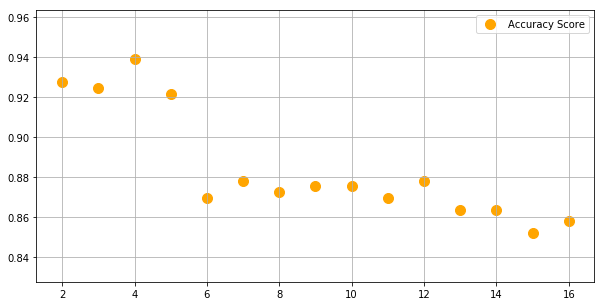

In [178]:
components = list(range(2,num+2))
plt.figure(figsize=(10,5))
plt.scatter(components, list1, label = 'Accuracy Score', c = 'orange' , s= 100,  alpha = 1)
plt.rc('grid', linestyle="--", color='green')
plt.grid(True)
plt.legend()
plt.show()